In [1]:
from keras.datasets import mnist
from matplotlib import pyplot

In [2]:
(trainX, trainy), (testX, testy) = mnist.load_data()

In [3]:
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [32]:
trainX[0][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
        90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [8]:
trainy

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

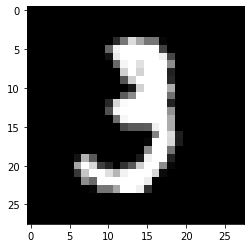

In [33]:
pyplot.imshow(trainX[10], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [34]:
trainy[10]

3

In [35]:
# trainX = trainX.reshape((trainX.shape[0], 28, 28, 1)).astype('float32')
# testX = testX.reshape((testX.shape[0],28,28,1)).astype('float32')
trainX = trainX.reshape((trainX.shape[0], 28*28)).astype('float32')
testX = testX.reshape((testX.shape[0], 28*28)).astype('float32')

In [36]:
trainX = trainX /255
testX = testX /255

In [37]:
from keras.utils import np_utils

print(trainy.shape)

y_train = np_utils.to_categorical(trainy)
y_test = np_utils.to_categorical(testy)
print(y_train.shape)

(60000,)
(60000, 10)


In [38]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [99]:
net = Sequential()

In [100]:
net.add(Dense(64, input_dim = 28 * 28,  activation='relu', kernel_initializer='he_uniform' ))

In [101]:
net.add(Dense(100, activation='relu'))
net.add(Dense(10, activation='softmax'))

In [103]:
import keras.metrics
# net.compile(loss='mean_squared_error', optimizer = optimizers.SGD(learning_rate=0.1),metrics= ['accuracy'])
net.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
            metrics=[keras.metrics.Precision(), keras.metrics.Recall()])#metrics= ['accuracy'])

In [104]:
net.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_25 (Dense)             (None, 100)               6500      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1010      
Total params: 57,750
Trainable params: 57,750
Non-trainable params: 0
_________________________________________________________________


In [105]:
net.fit(trainX, y_train, epochs= 10, batch_size = 100)

Epoch 1/10
600/600 [==============================] - 6s 4ms/step - loss: 0.6352 - precision: 0.9212 - recall: 0.6981
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1685 - precision: 0.9607 - recall: 0.9412
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1217 - precision: 0.9712 - recall: 0.9580
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0933 - precision: 0.9765 - recall: 0.9673
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0778 - precision: 0.9806 - recall: 0.9730
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0636 - precision: 0.9832 - recall: 0.9779
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0536 - precision: 0.9858 - recall: 0.9810
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0481 - precision: 0.9879 - recall: 0.9834
Epoch 9/10
600/600 [==============================] - 2s

In [107]:
scores = net.evaluate(testX, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0985 - precision: 0.9728 - recall: 0.9691
